In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [268]:
df = pd.read_csv('UML_2024.csv')
df.head()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [270]:
nan_count = df.isna().sum()
print("\nConteo de valores NaN en cada columna:")
print(nan_count)


Conteo de valores NaN en cada columna:
cid                              0
Molecular_weight                 0
LogP                             0
Number_of_HBA_1                  0
Number_of_HBA_2                  0
Number_of_HBD_1                  0
Number_of_HBD_2                  0
Number_of_acidic_groups          0
Number_of_aliphatic_OH_groups    0
Number_of_basic_groups           0
Fraction_of_rotatable_bonds      0
Number_of_heavy_bonds            0
Number_of_heterocycles           0
Number_of_hydrophobic_groups     0
MolarRefractivity                0
Number_of_atoms                  0
Number_of_halogen_atoms          0
Number_of_B_atoms                0
Number_of_Br_atoms               0
Number_of_Cl_atoms               0
Number_of_I_atoms                0
Number_of_F_atoms                0
Number_of_N_atoms                0
Number_of_O_atoms                0
Number_of_P_atoms                0
Number_of_S_atoms                0
Number_of_bonds                  0
Number_of_NO2_g

In [271]:
rows_with_nan = df[df.isna().any(axis=1)]
print("\nFilas con al menos un valor NaN:")
print(rows_with_nan)


Filas con al menos un valor NaN:
         cid  Molecular_weight    LogP  Number_of_HBA_1  Number_of_HBA_2   
76  67405749        246.229996  2.1464               18                8  \

    Number_of_HBD_1  Number_of_HBD_2  Number_of_acidic_groups   
76                2                0                        0  \

    Number_of_aliphatic_OH_groups  Number_of_basic_groups  ...   
76                              0                       0  ...  \

    Number_of_OSO_groups  Number_of_SO2_groups  PolarSurfaceArea   
76                     0                     0            137.74  \

    Geometrical_diameter  Geometrical_radius  Geometrical_shape_coefficient   
76              7.017503                 0.0                            NaN  \

    Kier_shape_1  Kier_shape_2  Zagreb_group_index_1  Zagreb_group_index_2  
76     16.055556      8.991736                   126                   126  

[1 rows x 39 columns]


In [272]:
df= df.dropna()

In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,299.0,3.591029e+07,4.070267e+07,1046.000000,5.281232e+06,1.388347e+07,6.895019e+07,1.560257e+08
Molecular_weight,299.0,3.351035e+02,1.431022e+02,122.115432,1.856230e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,299.0,7.947166e+00,6.128274e+00,-1.765100,2.403450e+00,6.700400e+00,1.358675e+01,4.037570e+01
Number_of_HBA_1,299.0,3.017391e+01,1.828989e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,299.0,4.448161e+00,1.209507e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,299.0,1.431438e+00,8.657240e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,299.0,1.498328e+00,1.168302e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,299.0,3.244147e-01,5.230646e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,299.0,5.551839e-01,9.265645e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,299.0,4.347826e-02,2.863493e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


Number_of_HBA_2 and Number_of_alophatic_OH_groups

C:\Users\FABRICIO\AppData\Local\Temp\ipykernel_13148\1151973338.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
C:\Users\FABRICIO\AppData\Local\Temp\ipykernel_13148\1151973338.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels)


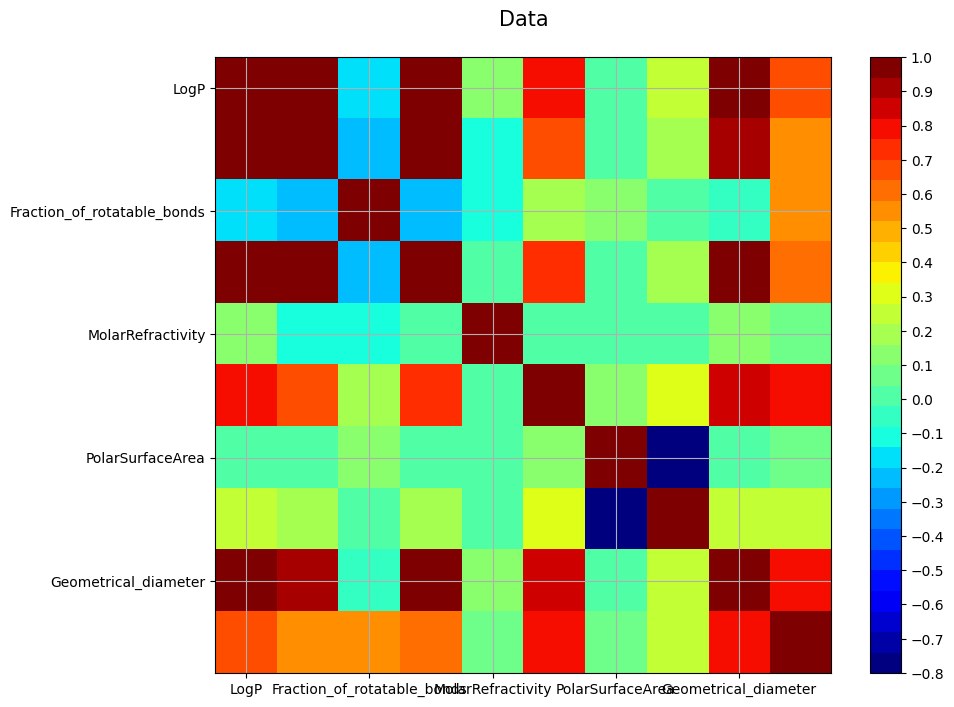

In [274]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Data\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels)
    ax1.set_yticklabels(labels)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df1)

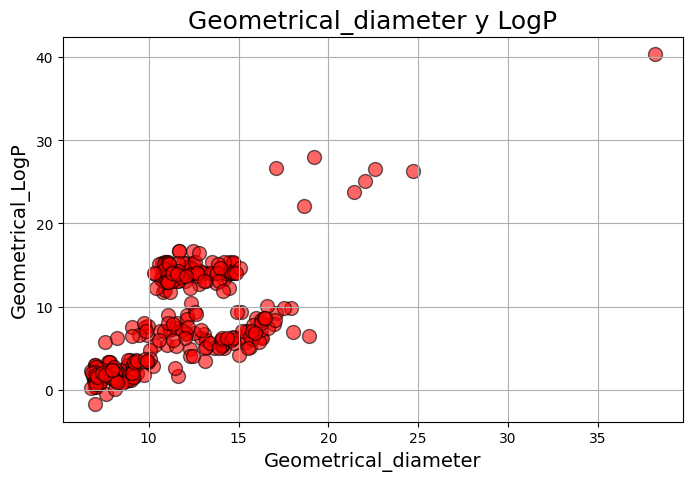

In [275]:
plt.figure(figsize=(8,5))
plt.title("Geometrical_diameter y LogP",fontsize=18)
plt.xlabel ("Geometrical_diameter",fontsize=14)
plt.ylabel ("LogP",fontsize=14)
plt.grid(True)
plt.scatter(df['Geometrical_diameter'],df['LogP'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [281]:
X = df.iloc[:,[2,32]].values

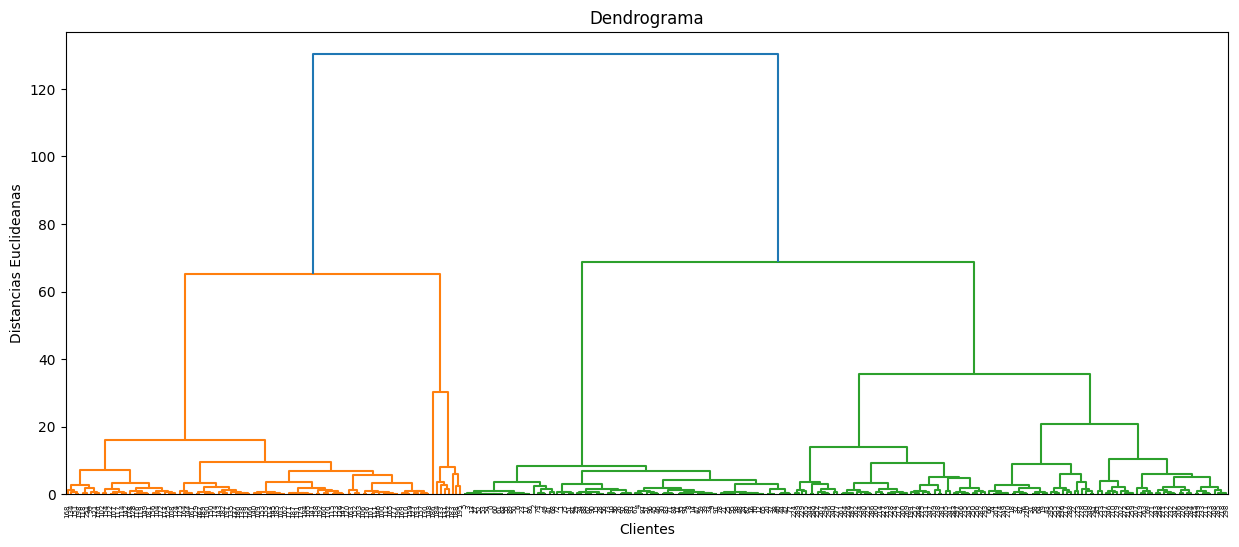

In [282]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclideanas')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [283]:
from sklearn.cluster import KMeans

In [284]:
kmeans = KMeans(n_clusters=4,verbose=0,tol=1e-3,max_iter=300,n_init=20)

In [285]:
kmeans.fit(df)

KMeans(n_clusters=4, n_init=20, tol=0.001)

In [286]:
clus_cent=kmeans.cluster_centers_

array([[ 7.78560658e+06,  3.31090588e+02,  7.82485323e+00,
         2.97688172e+01,  4.33333333e+00,  1.41935484e+00,
         1.59677419e+00,  3.60215054e-01,  6.02150538e-01,
         1.07526882e-02,  1.72582210e-01,  2.53978495e+01,
         3.17204301e-01,  0.00000000e+00,  1.19990972e+02,
         4.95591398e+01,  1.12903226e-01,  0.00000000e+00,
         1.61290323e-02,  4.83870968e-02,  1.07526882e-02,
         3.76344086e-02,  1.00537634e+00,  3.46236559e+00,
         1.30104261e-18,  1.04083409e-17,  5.11935484e+01,
         2.15053763e-02,  0.00000000e+00,  0.00000000e+00,
         5.20417043e-18,  7.36255376e+01,  1.12361709e+01,
         9.51500436e-01,  1.16762967e+01,  1.91936513e+01,
         7.88872881e+00,  2.67811828e+02,  2.92994624e+02],
       [ 7.74047912e+07,  3.55315484e+02,  9.15064102e+00,
         3.34745763e+01,  4.49152542e+00,  1.47457627e+00,
         1.32203390e+00,  3.05084746e-01,  5.76271186e-01,
         1.18644068e-01,  1.79116448e-01,  2.67118644e+

In [287]:
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,7.785607e+06,331.090588,7.824853,29.768817,4.333333,1.419355,1.596774,0.360215,0.602151,1.075269e-02,...,0.0,5.204170e-18,73.625538,11.236171,0.951500,11.676297,19.193651,7.888729,267.811828,292.994624
1,7.740479e+07,355.315484,9.150641,33.474576,4.491525,1.474576,1.322034,0.305085,0.576271,1.186441e-01,...,0.0,6.779661e-02,76.622542,11.922973,0.927192,14.445634,20.717647,8.566972,294.271186,321.016949
2,1.335358e+08,416.648208,10.865300,39.434783,4.521739,1.608696,2.043478,0.434783,0.782609,6.938894e-18,...,0.0,1.734723e-18,77.203913,13.656762,0.940214,13.861512,24.556807,10.186085,357.826087,391.478261
3,5.325319e+07,260.212483,4.225494,19.451613,5.000000,1.290323,0.838710,0.064516,0.064516,1.290323e-01,...,0.0,3.469447e-18,80.029677,10.572825,0.983185,10.051134,15.698711,7.754327,160.774194,162.096774


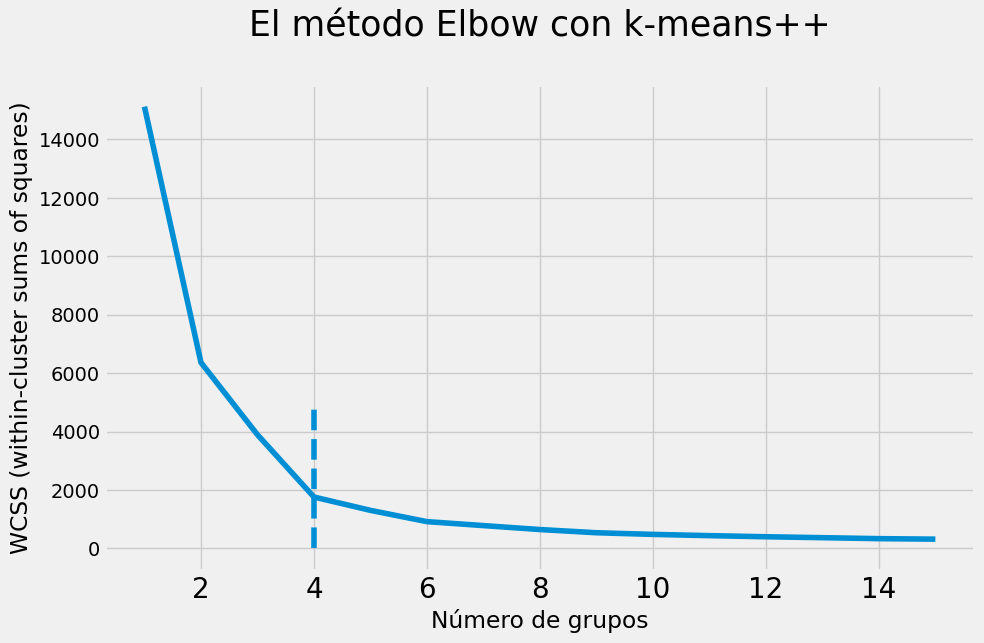

In [290]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i,  n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('El método Elbow con k-means++\n',fontsize=25)
    plt.xlabel('Número de grupos')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=4,ymin=0,ymax=5000,linestyles='--')
    
    plt.show()

In [291]:
X=df

In [296]:
from sklearn.preprocessing import MinMaxScaler

In [297]:
scaler = MinMaxScaler()

In [298]:
X_scaled=scaler.fit_transform(X)

In [299]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [301]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)

    print("Score para el número de grupos {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))

    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score para el número de grupos {}: {}".format(i,silhouette))

    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score para el número de grupos {}: {}".format(i,db))


c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\

Score para el número de grupos 2: -205.41233523160233
Silhouette score para el número de grupos 2: 0.34198218674791103
Davies Bouldin score para el número de grupos 2: 1.1817286436670356
Score para el número de grupos 3: -153.41939671982985
Silhouette score para el número de grupos 3: 0.34364615661772946
Davies Bouldin score para el número de grupos 3: 1.1716593281427208
Score para el número de grupos 4: -135.7975049477441
Silhouette score para el número de grupos 4: 0.33432741230204627
Davies Bouldin score para el número de grupos 4: 1.180232540931251
Score para el número de grupos 5: -123.41918351222981
Silhouette score para el número de grupos 5: 0.3468668886075295
Davies Bouldin score para el número de grupos 5: 1.1665853477555432


c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\

Score para el número de grupos 6: -112.81581902271023
Silhouette score para el número de grupos 6: 0.36597404422080015
Davies Bouldin score para el número de grupos 6: 1.1992894073487306
Score para el número de grupos 7: -102.43631111080411
Silhouette score para el número de grupos 7: 0.32053904746433876
Davies Bouldin score para el número de grupos 7: 1.2789709561817584
Score para el número de grupos 8: -96.84977657981601
Silhouette score para el número de grupos 8: 0.318103941951902
Davies Bouldin score para el número de grupos 8: 1.2461573166998932
Score para el número de grupos 9: -89.77518125438809
Silhouette score para el número de grupos 9: 0.3207063168098557
Davies Bouldin score para el número de grupos 9: 1.1106484135464354
Score para el número de grupos 10: -85.34487672826995
Silhouette score para el número de grupos 10: 0.32104142298568183
Davies Bouldin score para el número de grupos 10: 1.1057015580883287
Score para el número de grupos 11: -79.31528860914278
Silhouette sco

c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


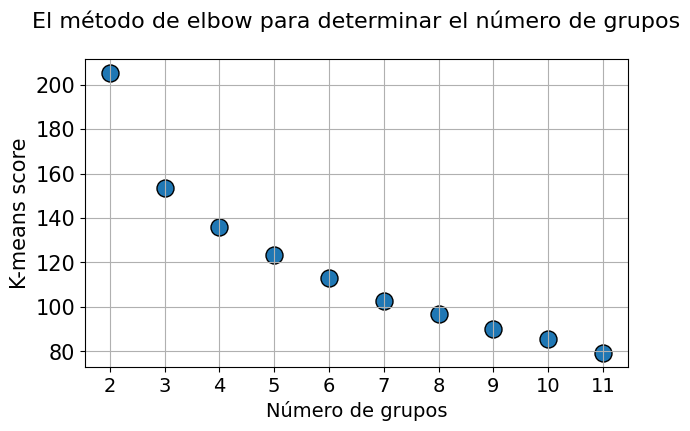

In [302]:
plt.figure(figsize=(7,4))
plt.title("El método de elbow para determinar el número de grupos\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Número de grupos",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()